#### ------------------------------------ DATA PROCESSING ------------------------------------------------------

Dry Signal Length: 100160
Wet Signal Length: 100160


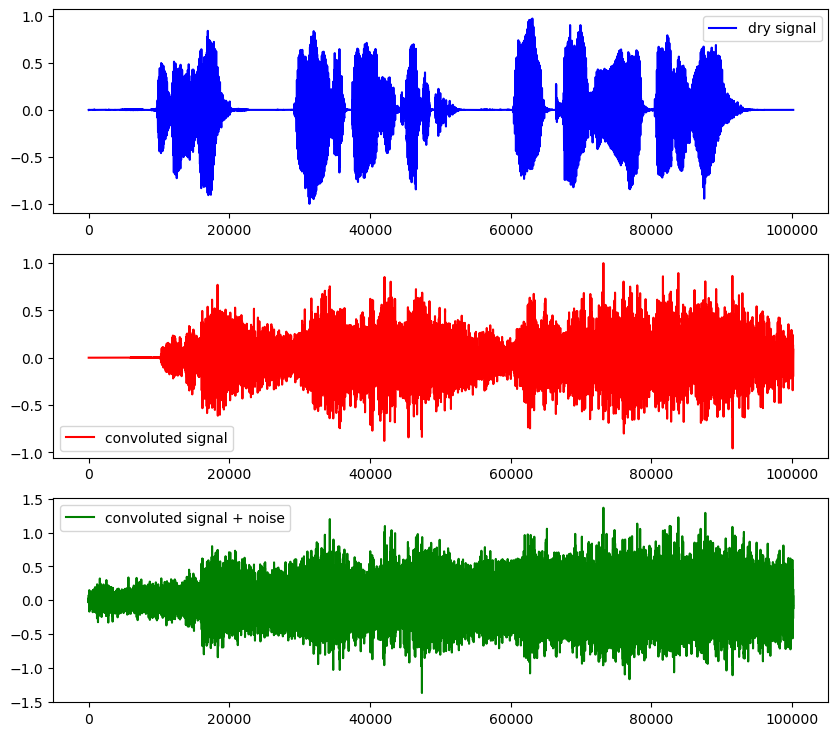

In [16]:
import librosa
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve
import numpy as np
import soundfile as sf

dry_signal_path = "/workspace/unicamp/IA009/Projeto Final/LibriSpeech/dev-clean/251/118436/251-118436-0000.flac"
ir_path = "/workspace/unicamp/IA009/Projeto Final/sports-centre-university-york/sports-centre-university-york/mono/sportscentre_cardioid.wav"
noise_path = "/workspace/unicamp/IA009/Projeto Final/noise.wav"
dry_signal, dry_signal_sr = librosa.load(dry_signal_path, sr=16000)
dry_signal_normalized = dry_signal/np.max(np.abs(dry_signal))
ir, ir_sr = librosa.load(ir_path, sr=16000)
noise, noise_sr = librosa.load(noise_path, sr=16000)
wet_signal = fftconvolve(dry_signal, ir, mode="full")
wet_signal = wet_signal[:len(dry_signal)]
wet_signal = wet_signal/np.max(np.abs(wet_signal))
wet_signal_plus_noise = wet_signal + noise[:len(wet_signal)]
wet_signal_normalized = wet_signal/np.max(np.abs(wet_signal))
print(f"Dry Signal Length: {len(dry_signal)}\nWet Signal Length: {len(wet_signal)}")

fig, ax = plt.subplots(3, 1, figsize=(10, 9))
ax[0].plot(dry_signal_normalized, color='blue', label='dry signal')
ax[0].legend()
ax[1].plot(wet_signal, color='red', label='convoluted signal')
ax[1].legend()
ax[2].plot(wet_signal_plus_noise, color='green', label='convoluted signal + noise')
ax[2].legend()

#### ------------------------------------ WIENER SOLUTION ------------------------------------------------------

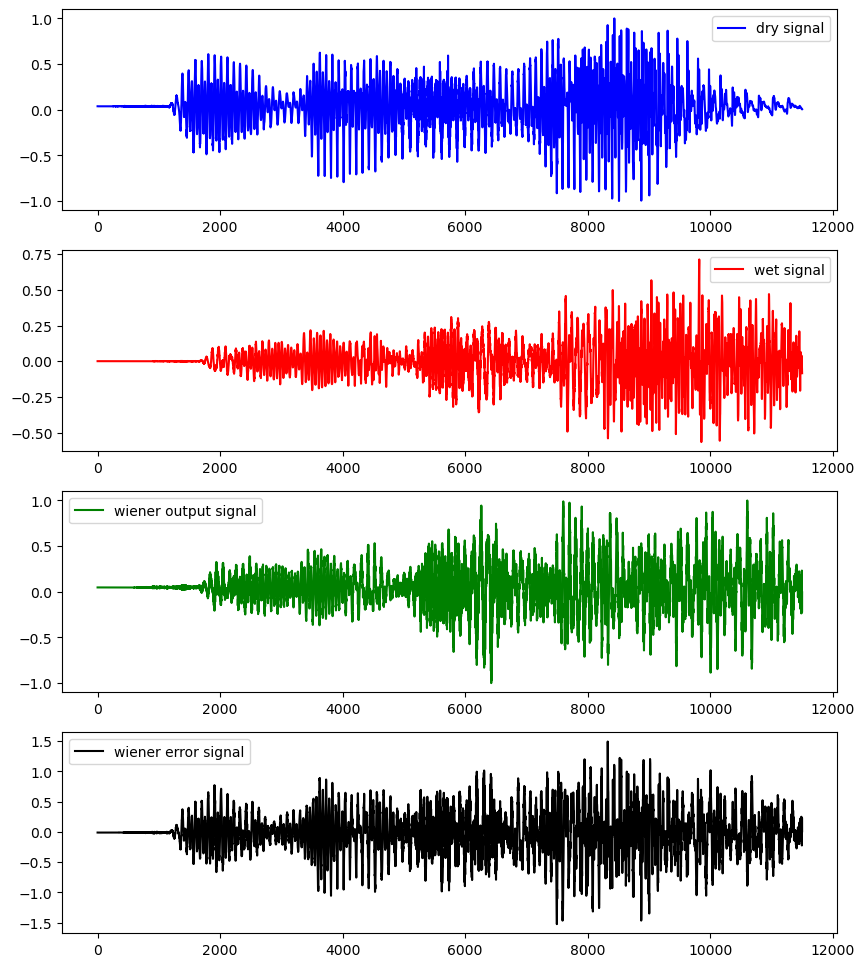

In [52]:
import numpy as np

def wiener(desired_signal, input_signal, filtering_order):
    # Compute autocorrelation of the input signal
    r = np.correlate(input_signal, input_signal, mode="full")
    r = r[len(r)//2:]  # Only keep the positive lags

    # Create the autocorrelation matrix R
    R = np.zeros((filtering_order, filtering_order))
    for i in range(filtering_order):
        for j in range(filtering_order):
            R[i, j] = r[abs(i-j)]  # Lagged correlation

    # Compute cross-correlation of the desired signal and input signal
    p = np.correlate(input_signal, desired_signal, mode="full")
    p = p[len(p)//2:]  # Only keep the positive lags
    p = p[:filtering_order]  # Match the size to filtering_order

    # Solve for the Wiener filter coefficients (h = R^-1 * p)
    R_inv = np.linalg.inv(R)  # Inverse of autocorrelation matrix
    h = np.dot(R_inv, p)  # Wiener filter coefficients

    # Apply the Wiener filter to the input signal
    filtered_signal = np.convolve(input_signal, h, mode='same')

    return filtered_signal, h

filtering_order = 100
output_signal, weights = wiener(dry_signal_normalized, wet_signal_normalized, filtering_order=filtering_order)

fig, ax = plt.subplots(4, 1, figsize=(10, 12))
output_signal = 2 * (output_signal - np.min(output_signal)) / (np.max(output_signal) - np.min(output_signal)) - 1
dry_signal = 2 * (dry_signal - np.min(dry_signal)) / (np.max(dry_signal) - np.min(dry_signal)) - 1
error_signal = dry_signal - output_signal
ax[0].plot(dry_signal, color='blue', label='dry signal')
ax[0].legend()
ax[1].plot(wet_signal, color='red', label='wet signal')
ax[1].legend()
ax[2].plot(output_signal, color="green", label="wiener output signal")
ax[2].legend()
ax[3].plot(error_signal, color="black", label="wiener error signal")
ax[3].legend()

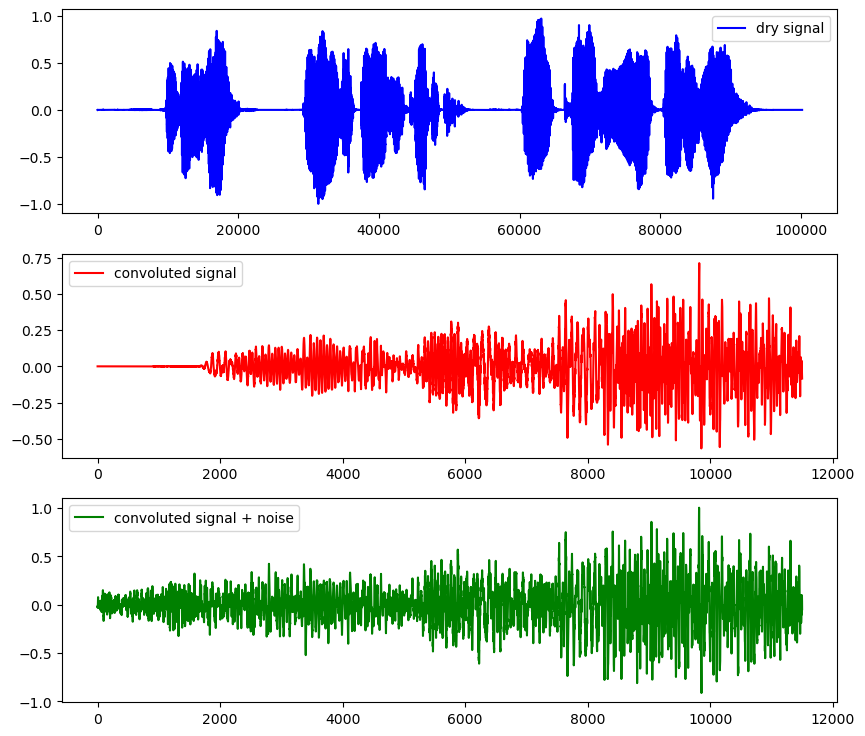

In [48]:
import librosa
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve
import numpy as np
import soundfile as sf

dry_signal_path = "/workspace/unicamp/IA009/Projeto Final/LibriSpeech/dev-clean/251/118436/251-118436-0000.flac"
ir_path = "/workspace/unicamp/IA009/Projeto Final/sports-centre-university-york/sports-centre-university-york/mono/sportscentre_cardioid.wav"
noise_path = "/workspace/unicamp/IA009/Projeto Final/noise.wav"
dry_signal, dry_signal_sr = librosa.load(dry_signal_path, sr=16000)
ir, ir_sr = librosa.load(ir_path, sr=16000)
noise, noise_sr = librosa.load(noise_path, sr=16000)
dry_signal = dry_signal[8500:20000]
wet_signal = fftconvolve(dry_signal, ir, mode="full")
wet_signal = wet_signal[:len(dry_signal)]

fig, ax = plt.subplots(3, 1, figsize=(10, 9))
ax[0].plot(dry_signal_normalized, color='blue', label='dry signal')
ax[0].legend()
ax[1].plot(wet_signal, color='red', label='convoluted signal')
ax[1].legend()
ax[2].plot(wet_signal_plus_noise, color='green', label='convoluted signal + noise')
ax[2].legend()

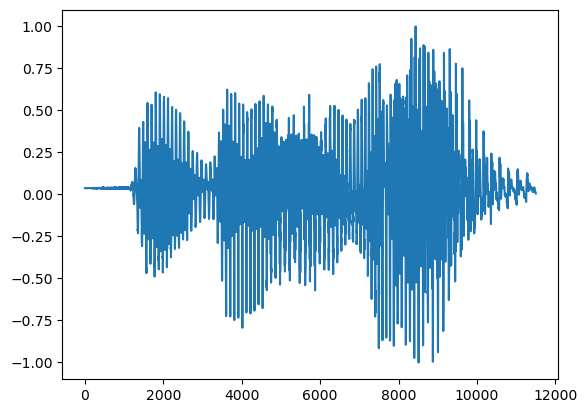

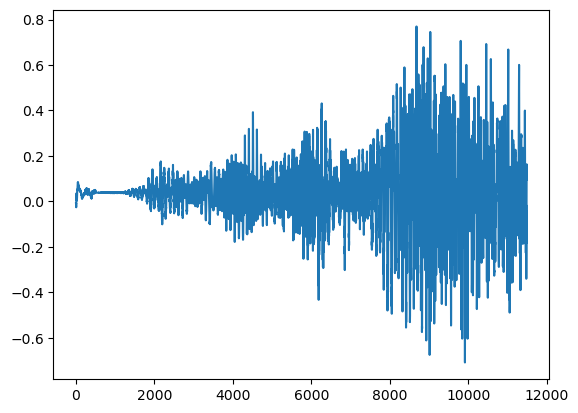

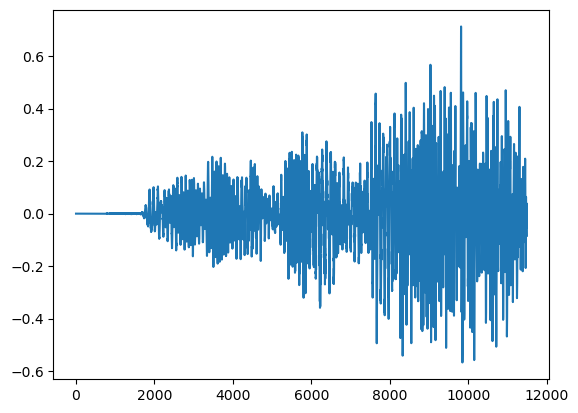

In [56]:
output, weights = wiener(normalize(dry_signal), normalize(wet_signal), 1000)

plt.plot(dry_signal)
plt.show()
plt.plot(output)
plt.show()
plt.plot(wet_signal)
plt.show()

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import wiener
def wiener(desired_signal, input_signal, filtering_order):
    # Compute autocorrelation of the input signal
    r = np.correlate(input_signal, input_signal, mode="full")
    r = r[len(r)//2:]  # Only keep the positive lags

    # Create the autocorrelation matrix R
    R = np.zeros((filtering_order, filtering_order))
    for i in range(filtering_order):
        for j in range(filtering_order):
            R[i, j] = r[abs(i-j)]  # Lagged correlation

    # Compute cross-correlation of the desired signal and input signal
    p = np.correlate(input_signal, desired_signal, mode="full")
    p = p[len(p)//2:]  # Only keep the positive lags
    p = p[:filtering_order]  # Match the size to filtering_order

    # Solve for the Wiener filter coefficients (h = R^-1 * p)
    R_inv = np.linalg.inv(R)  # Inverse of autocorrelation matrix
    h = np.dot(R_inv, p)  # Wiener filter coefficients

    # # Apply the Wiener filter to the input signal
    filtered_signal = np.convolve(input_signal, h, mode='same')

    return filtered_signal, h

# Sinal original (senoide)
fs = 1000  # Frequência de amostragem
t = np.linspace(0, 1, fs, endpoint=False)  # 1 segundo
original_signal = np.sin(2 * np.pi * 5 * t)  # Sinal de 5 Hz

# Adicionando ruído ao sinal
np.random.seed(42)  # Para reprodutibilidade
noise = np.random.normal(0, 0.5, size=fs)  # Ruído gaussiano
noisy_signal = original_signal + noise

# Aplicando o filtro de Wiener
weights = wiener(original_signal, noisy_signal, 100)

filtered_signal = np.convolve(noisy_signal, weights, mode='full')
filtered_signal = 2 * (filtered_signal - np.min(filtered_signal)) / (np.max(filtered_signal) - np.min(filtered_signal)) - 1
filtered_signal = filtered_signal[:len(original_signal)]

def normalize(signal):
    return 2 * (signal - np.min(signal)) / (np.max(signal) - np.min(signal)) - 1
# # Plotando os resultados
# plt.figure(figsize=(12, 6))
# plt.subplot(3, 1, 1)
# plt.plot(t, original_signal, label="Sinal Original")
# plt.legend()
# plt.subplot(3, 1, 2)
# plt.plot(t, noisy_signal, label="Sinal com Ruído", color="orange")
# plt.legend()
# plt.subplot(3, 1, 3)
# plt.plot(t, filtered_signal, label="Sinal Filtrado (Wiener)", color="green")
# plt.legend()
# plt.xlabel("Tempo (s)")
# plt.tight_layout()
# plt.show()
original_signal

array([ 0.00000000e+00,  3.14107591e-02,  6.27905195e-02,  9.41083133e-02,
        1.25333234e-01,  1.56434465e-01,  1.87381315e-01,  2.18143241e-01,
        2.48689887e-01,  2.78991106e-01,  3.09016994e-01,  3.38737920e-01,
        3.68124553e-01,  3.97147891e-01,  4.25779292e-01,  4.53990500e-01,
        4.81753674e-01,  5.09041416e-01,  5.35826795e-01,  5.62083378e-01,
        5.87785252e-01,  6.12907054e-01,  6.37423990e-01,  6.61311865e-01,
        6.84547106e-01,  7.07106781e-01,  7.28968627e-01,  7.50111070e-01,
        7.70513243e-01,  7.90155012e-01,  8.09016994e-01,  8.27080574e-01,
        8.44327926e-01,  8.60742027e-01,  8.76306680e-01,  8.91006524e-01,
        9.04827052e-01,  9.17754626e-01,  9.29776486e-01,  9.40880769e-01,
        9.51056516e-01,  9.60293686e-01,  9.68583161e-01,  9.75916762e-01,
        9.82287251e-01,  9.87688341e-01,  9.92114701e-01,  9.95561965e-01,
        9.98026728e-01,  9.99506560e-01,  1.00000000e+00,  9.99506560e-01,
        9.98026728e-01,  

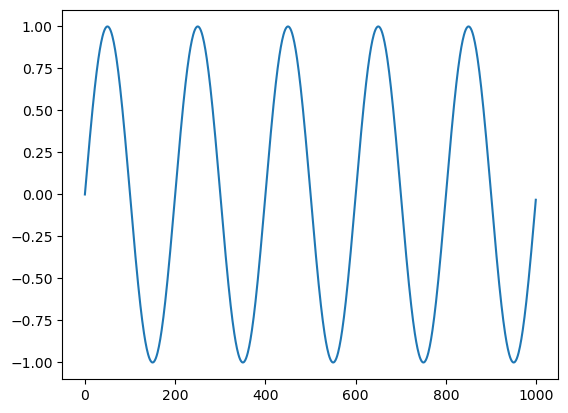

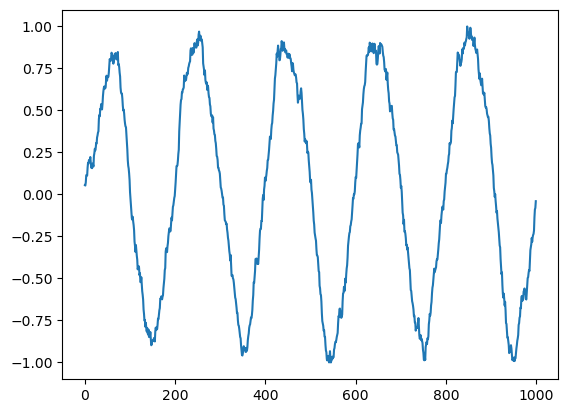

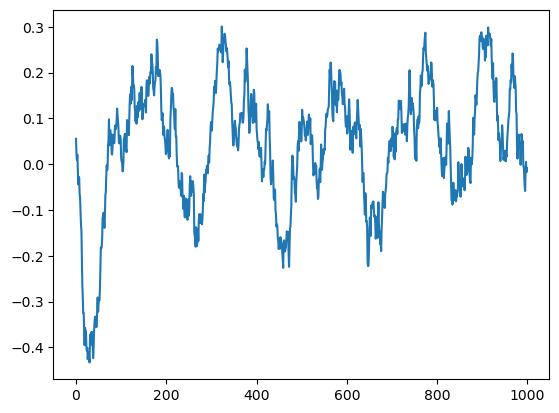

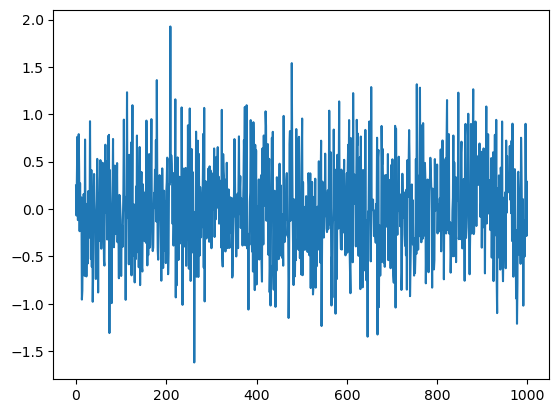

In [36]:
error = filtered_signal - original_signal
plt.plot(original_signal)
plt.show()
plt.plot(filtered_signal)
plt.show()
plt.plot(error)
plt.show()
plt.plot(noise)
plt.show()